<a href="https://colab.research.google.com/github/yannick42/notebooks/blob/master/_notebooks/2022-04-22-Kaggle_Survey_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Kaggle Survey 2020 (WIP)"
> "EDA/Plots/..."

- toc: true
- badges: false
- comments: false
- author: Yannick
- categories: [EDA]

An industry-wide survey, and comprehensive view of the state of data science and machine learning.
https://www.kaggle.com/competitions/kaggle-survey-2020

# Setup

In [3]:
%%capture
!pip install kaggle --upgrade

In [8]:
import os
from getpass import getpass
kaggle_username = input("Kaggle USERNAME : ")
os.environ['KAGGLE_USERNAME'] = kaggle_username
kaggle_key = getpass("Kaggle KEY for "+os.environ.get('KAGGLE_USERNAME')+": ")
os.environ["KAGGLE_KEY"] = kaggle_key

Kaggle USERNAME : yannick42
Kaggle KEY for yannick42: ··········


In [9]:
!kaggle competitions download -c kaggle-survey-2020
!unzip -n kaggle-survey-2020.zip
!ls -la

  0% 0.00/2.08M [00:00<?, ?B/s]
100% 2.08M/2.08M [00:00<00:00, 137MB/s]
Archive:  kaggle-survey-2020.zip
  inflating: kaggle_survey_2020_responses.csv  
  inflating: supplementary_data/kaggle_survey_2020_answer_choices.pdf  
  inflating: supplementary_data/kaggle_survey_2020_methodology.pdf  
total 26988
drwxr-xr-x 1 root root     4096 Apr 22 20:02 .
drwxr-xr-x 1 root root     4096 Apr 22 18:21 ..
drwxr-xr-x 4 root root     4096 Apr 19 14:22 .config
-rw-r--r-- 1 root root 25431748 Nov 17  2020 kaggle_survey_2020_responses.csv
-rw-r--r-- 1 root root  2179679 Apr 22 20:02 kaggle-survey-2020.zip
drwxr-xr-x 1 root root     4096 Apr 19 14:23 sample_data
drwxr-xr-x 2 root root     4096 Apr 22 20:02 supplementary_data


# Load & display some data 

In [10]:
import pandas as pd
import numpy as np
np.random.seed(42)

from matplotlib import pyplot as plt
import seaborn as sns

"""
x columns :
- questions
"""

# header=None => skip header... (but no more "Q1", ...)
df = pd.read_csv(
  'kaggle_survey_2020_responses.csv',
  parse_dates=True,
  infer_datetime_format=True
)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
#print(df.columns.to_list())
print(len(df.columns.to_list()) - 1, "questions")

df.describe()

354 questions


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [15]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pie charts

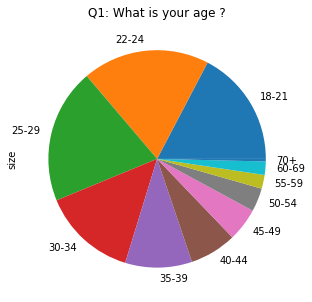

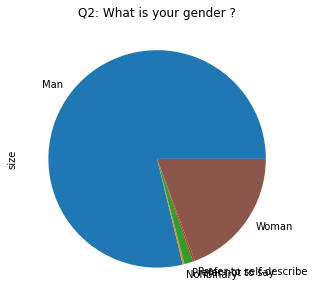

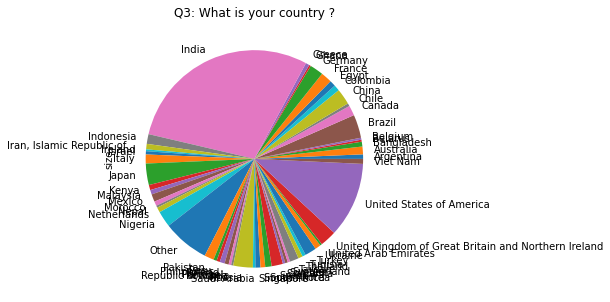

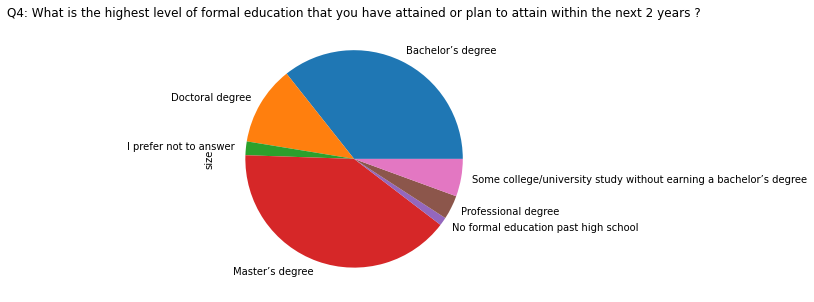

In [16]:
#collapse-hide

# Question 2
s = df.groupby(['Q1']).size().to_frame('size')
#print(s)
plots = s.where(s['size'] > 1).plot.pie(subplots=True, figsize=(5, 5), legend=False)
plots[0].set_title('Q1: What is your age ?')


# Question 2
s = df.groupby(['Q2']).size().to_frame('size')
#print(s)
plots = s.where(s['size'] > 1).plot.pie(subplots=True, figsize=(5, 5), legend=False)
plots[0].set_title('Q2: What is your gender ?')


# Question 3
s = df.groupby(['Q3']).size().to_frame('size')
#print(s)
plots = s.where(s['size'] > 1).plot.pie(subplots=True, figsize=(5, 5), legend=False)
plots[0].set_title('Q3: What is your country ?')


# Question 4
s = df.groupby(['Q4']).size().to_frame('size')
#print(s)
plots = s.where(s['size'] > 1).plot.pie(subplots=True, figsize=(5, 5), legend=False)
plots[0].set_title('Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years ?')

print()